In [ ]:
!wget https://github.com/jbrownlee/Datasets/releases/download/Flickr8k/Flickr8k_Dataset.zip
!wget https://github.com/jbrownlee/Datasets/releases/download/Flickr8k/Flickr8k_text.zip
!wget http://nlp.stanford.edu/data/glove.6B.zip
!unzip /content/glove.6B.zip
!unzip Flickr8k_Dataset.zip -d all_images
!unzip Flickr8k_text.zip -d all_captions

Streaming output truncated to the last 5000 lines.
  inflating: all_images/__MACOSX/Flicker8k_Dataset/._3429465163_fb8ac7ce7f.jpg  
  inflating: all_images/Flicker8k_Dataset/3429581486_4556471d1a.jpg  
  inflating: all_images/__MACOSX/Flicker8k_Dataset/._3429581486_4556471d1a.jpg  
  inflating: all_images/Flicker8k_Dataset/3429641260_2f035c1813.jpg  
  inflating: all_images/__MACOSX/Flicker8k_Dataset/._3429641260_2f035c1813.jpg  
  inflating: all_images/Flicker8k_Dataset/3429956016_3c7e3096c2.jpg  
  inflating: all_images/__MACOSX/Flicker8k_Dataset/._3429956016_3c7e3096c2.jpg  
  inflating: all_images/Flicker8k_Dataset/3430100177_5864bf1e73.jpg  
  inflating: all_images/__MACOSX/Flicker8k_Dataset/._3430100177_5864bf1e73.jpg  
  inflating: all_images/Flicker8k_Dataset/3430287726_94a1825bbf.jpg  
  inflating: all_images/__MACOSX/Flicker8k_Dataset/._3430287726_94a1825bbf.jpg  
  inflating: all_images/Flicker8k_Dataset/3430526230_234b3550f6.jpg  
  inflating: all_images/__MACOSX/Flicker8k_

In [ ]:
!pip uninstall keras
!pip install keras==2.3.1
!pip uninstall tensorflow
!pip install tensorflow==2.2

Uninstalling Keras-2.4.3:
  Would remove:
    /usr/local/lib/python3.6/dist-packages/Keras-2.4.3.dist-info/*
    /usr/local/lib/python3.6/dist-packages/docs/*
    /usr/local/lib/python3.6/dist-packages/keras/*
  Would not remove (might be manually added):
    /usr/local/lib/python3.6/dist-packages/docs/md_autogen.py
    /usr/local/lib/python3.6/dist-packages/docs/update_docs.py
Proceed (y/n)? y
  Successfully uninstalled Keras-2.4.3
     |████████████████████████████████| 378kB 5.3MB/s 
     |████████████████████████████████| 51kB 6.5MB/s 


Uninstalling tensorflow-2.3.0:
  Would remove:
    /usr/local/bin/estimator_ckpt_converter
    /usr/local/bin/saved_model_cli
    /usr/local/bin/tensorboard
    /usr/local/bin/tf_upgrade_v2
    /usr/local/bin/tflite_convert
    /usr/local/bin/toco
    /usr/local/bin/toco_from_protos
    /usr/local/lib/python3.6/dist-packages/tensorflow-2.3.0.dist-info/*
    /usr/local/lib/python3.6/dist-packages/tensorflow/*
Proceed (y/n)? y
  Successfully uninstalled tensorflow-2.3.0
     |████████████████████████████████| 516.2MB 31kB/s 
     |████████████████████████████████| 460kB 54.6MB/s 
     |████████████████████████████████| 3.0MB 55.8MB/s 
  Found existing installation: tensorflow-estimator 2.3.0
    Uninstalling tensorflow-estimator-2.3.0:
      Successfully uninstalled tensorflow-estimator-2.3.0
  Found existing installation: tensorboard 2.3.0
    Uninstalling tensorboard-2.3.0:
      Successfully uninstalled tensorboard-2.3.0


In [ ]:
import numpy as np
import os
import matplotlib.pyplot as plt
import pandas as pd
import shutil
import pickle
from keras.applications import ResNet50
from keras.applications.resnet50 import preprocess_input, decode_predictions
from keras.models import Model,Sequential,load_model
from keras.layers import *
import re
import json
import collections
import time
from keras.utils import to_categorical
from keras.preprocessing.sequence import pad_sequences
from keras.preprocessing import image

def load_doc(path):
    
    with open(path, encoding='utf8') as file:
        text = file.read()
    return text

In [ ]:
text = load_doc("/content/all_captions/Flickr8k.token.txt")

captions = text.split('\n')[:-1] #last line is empty

captions[0]

cap = captions[0].split('\t')
img_id = cap[0].split('.')[0]
caption = cap[1]

def get_img_caption_mapping(text):
    description = {}
    for ix in range(len(captions)):
        tex = captions[ix].split('\t')
       
        img_id = tex[0].split('.')[0]
        
        cap = tex[1]
        
        if description.get(img_id) is None:
            description[img_id] = []
        description[img_id].append(cap)
        
    return description

descriptions = get_img_caption_mapping(captions)


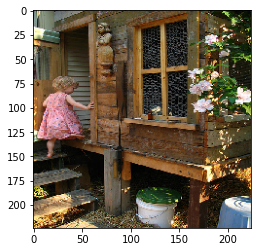

In [ ]:
IMG_path = "/content/all_images/Flicker8k_Dataset/"
img = image.load_img(IMG_path+"1000268201_693b08cb0e.jpg",target_size=(299, 299, 3))
img = image.img_to_array(img)/255.
plt.imshow(img)

def cleaned_captions(caption):

    caption = caption.lower()
    caption = re.sub("[^a-z]+"," ", caption)
    caption = [x for x in caption.split() if len(x)>1]
    caption = " ".join(caption)
    return sentence

for img_id,caption_list in descriptions.items():
    
    for i in range(len(caption_list)):
        
        caption_list[i] = clean_captions(caption_list[i])



In [ ]:
with open("description.txt",'w',encoding='utf8') as f:
    f.write(str(descriptions))

description = None
with open("description.txt",'r') as f:
    description = f.read()
    
json_acceptable_string = description.replace("'","\"")
description = json.loads(json_acceptable_string)

vocab = set()
total_words = []

for key in description.keys():
    [vocab.update(sentence.split()) for sentence in description[key]]
    [total_words.append(i) for des in description[key] for i in des.split()]

print(len(total_words),len(vocab))

counter = collections.Counter(total_words)
freq_count = dict(counter)

print(freq_count['the'])

sorted_freq_cnt = sorted(freq_count.items(),reverse=True,key = lambda x:x[1])
threshold = 10
sorted_freq_cnt = [x for x in sorted_freq_cnt if x[1]>threshold]
total_words = [x[0] for x in sorted_freq_cnt]

print(len(total_words))

train = load_doc("/content/all_captions/Flickr_8k.trainImages.txt")
test = load_doc("/content/all_captions/Flickr_8k.testImages.txt")

373837 8424
18420
1845


In [ ]:
train = [row.split('.')[0] for row in train.split('\n')]
test = [row.split('.')[0] for row in test.split('\n')]

print(len(description.keys()),len(train),len(test))

train = train[:-1] 
test = test[:-1] 

train_description = {}
for img_id in train:
    
    train_description[img_id] = []
    
    for caption in description[img_id]:
        caption = "<start> " + caption + " <end>"
        
        train_description[img_id].append(caption)

8092 6001 1001


In [ ]:
model = ResNet50(weights='imagenet', input_shape=(299, 299, 3))
model.summary()

A local file was found, but it seems to be incomplete or outdated because the md5 file hash does not match the original value of a7b3fe01876f51b976af0dea6bc144eb so we will re-download the data.
102858752/102853048 [==============================] - 3s 0us/step
Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
___________________________

In [ ]:
model_new = Model(model.input, model.layers[-2].output)

def preprocessing(imag):
    img = image.load_img(imag, target_size=(299, 299))
    img = image.img_to_array(img)
    img = np.expand_dims(img, axis=0)
    img = preprocess_input(img)

    return img

def encode(img):
    img = preprocessing(img)
    feature_vector = model_new.predict(img)
    feature_vector = feature_vector.reshape((2048, ))

    return feature_vector

encode(IMG_path+"1000268201_693b08cb0e.jpg").shape

(2048,)

In [ ]:
encoding_train = {}

for i,img_id in enumerate(train):
    
    path = IMG_path+img_id+".jpg"
    encoding_train[img_id] = encode(path)
    



0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4700
4800
4900
5000
5100
5200
5300
5400
5500
5600
5700
5800
5900
127.70034646987915


In [ ]:
encoding_test = {}

for i,img_id in enumerate(test):
    
    img_path = IMG_path+img_id+".jpg"
    encoding_test[img_id] = encode_img(img_path)

    

0
100
200
300
400
500
600
700
800
900
19.94080686569214


In [ ]:
with open("/content/pickle/training_encoded.pkl",'wb') as f:
    pickle.dump(encoding_train,f)
with open("/content/pickle/testing_encoded.pkl",'wb') as f:
    pickle.dump(encoding_test,f)

In [ ]:
word_index = {}
index_word = {}

for idx,word in enumerate(total_words):
    word_index[word] = idx + 1
    index_word[idx+1] = word

print(len(index_word))

word_index['<start>']= 1846
word_index['<end>'] = 1847

index_word[1846] = '<start>'
index_word[1847] = '<end>'

vocab_size = len(word_index)+1
print(vocab_size)

max_len = 0
for key in train_description.keys():
    
     for cap in train_description[key]:
            max_len = max(max_len,len(cap.split()))

1845
1848


In [ ]:
print(max_len)

35


In [ ]:
def data_generator(captions,encoding_image,word_index,max_len,batch_size):
    xa, xb, y = [],[],[]
    
    n = 0
    while True:
        for key, cap_list in captions.items():
            n += 1
            
            image = encoding_image[key]
            for cap in cap_list:
                
                seq = [word_index[word] for word in cap.split() if word in word_index]
                for i in range(1,len(seq)):
                    xi = seq[0:i]
                    yi = seq[i]
                    
                    xi = pad_sequences([xi],maxlen=max_len,value=0,padding='post')[0]
                    yi = to_categorical([yi],num_classes=vocab_size)[0]
                    
                    xa.append(image)
                    xb.append(xi)
                    y.append(yi)
                    
                if (n == batch_size):
                    yield [[np.array(xa),np.array(xb)],np.array(y)]
                    xa, xb, y = [], [], []
                    n = 0

a = data_generator(train_description,encoding_train,word_index,max_len,batch_size=1)

In [ ]:
f= open("glove.6B.200d.txt",'r',encoding='utf8')

embedding_index = {}
for line in f:
    values = line.split()
    word = values[0]
    vector = np.array(values[1:],dtype='float32')
    
    embedding_index[word] = vector

f.close()

def get_matrix(): 
    emb_dim = 200
    matrix = np.zeros((vocab_size,emb_dim))
    
    for word,idx in word_index.items():
        vector = embedding_index.get(word)
        
        if vector is not None:
            matrix[idx] = vector
            
    return matrix

embedding_matrix = get_matrix()
embedding_matrix.shape

(1848, 200)

In [ ]:
input_img = Input(shape=(2048, ))
image_model1 = Dropout(0.3)(input_img)
image_model2 = Dense(256, activation='relu')(image_model1)

input_cap = Input(shape=(max_len, ))
caption_model1 = Embedding(vocab_size, 200, mask_zero=True)(input_cap)
caption_model2 = Dropout(0.3)(caption_model1)
caption_model3 = LSTM(256)(caption_model2)

decoder = add([image_model2, caption_model3])
decoder_2 = Dense(256, activation='relu')(decoder)
output = Dense(vocab_size, activation='relu')(decoder_2)

model = Model(inputs=[input_img, input_cap], outputs=output)

model.summary()



Model: "model_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_5 (InputLayer)            (None, 35)           0                                            
__________________________________________________________________________________________________
input_4 (InputLayer)            (None, 2048)         0                                            
__________________________________________________________________________________________________
embedding_2 (Embedding)         (None, 35, 200)      369600      input_5[0][0]                    
__________________________________________________________________________________________________
dropout_3 (Dropout)             (None, 2048)         0           input_4[0][0]                    
____________________________________________________________________________________________

In [ ]:
model.layers[2].set_weights([embedding_matrix])
model.layers[2].trainable = False

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])

In [ ]:
epochs = 10
batch_size = 3
steps = len(train_description)//batch_size
generator = data_generator(train_description,encoding_train,word_index,max_len,batch_size)

def train():
    for i in range(epochs):
       
        model.fit_generator(generator,epochs=1,steps_per_epoch=steps,verbose=1)
        if i%2==0:
            model.save("/content/weights/final_model"+str(i*2)+'.h5')

train()

Epoch 1/1
2000/2000 [==============================] - 214s 107ms/step - loss: 10.9554 - acc: 0.1087
Epoch 1/1
2000/2000 [==============================] - 214s 107ms/step - loss: 10.8943 - acc: 0.1210
Epoch 1/1
2000/2000 [==============================] - 214s 107ms/step - loss: 10.8281 - acc: 0.1389
Epoch 1/1
2000/2000 [==============================] - 216s 108ms/step - loss: 10.7717 - acc: 0.1552
Epoch 1/1
2000/2000 [==============================] - 217s 108ms/step - loss: 10.7305 - acc: 0.1689
Epoch 1/1
2000/2000 [==============================] - 215s 108ms/step - loss: 10.7011 - acc: 0.1779
Epoch 1/1
2000/2000 [==============================] - 216s 108ms/step - loss: 10.7044 - acc: 0.1801
Epoch 1/1
2000/2000 [==============================] - 215s 107ms/step - loss: 10.6876 - acc: 0.1880
Epoch 1/1
 871/2000 [============>.................] - ETA: 2:01 - loss: 10.6961 - acc: 0.1829

In [ ]:
model.load_weights('./model_weights/model_new2.h5')

def predict_caption(image):
    
    start_se = "<start>"
    for i in range(max_len):
        sequence = [word_to_idx[w] for w in start_se.split() if w in word_to_idx]
        sequence = pad_sequences([sequence],maxlen=max_len,padding='post')
        
        ypred = model.predict([image,sequence])
        ypred = ypred.argmax()
        word = idx_to_word[ypred]
        start_se += (' ' + word)
        
        if word == "<end>":
            break
    
    final_caption = start_se.split()[1:-1]
    final_caption = ' '.join(final_caption)
    return final_caption

plt.style.use("ggplot")
for i in range(15):
    idx = np.random.randint(0,1000)
    all_img_names = list(encoding_test.keys())
    img_name = all_img_names[idx]
  
    image_full = encoding_test[img_name].reshape((1,2048))
    
    i = plt.imread(IMG_path+img_name+".jpg")
    caption = predict_caption(image_full)
    
    plt.title(caption)
    plt.imshow(y)
    plt.axis("off")
    plt.savefig("image_captioned_"+str(i*3)+'.jpg')
 

    plt.show()